In [109]:
# import pandas as pd
# import glob
# import re
# import os.path
# import datetime
# import mlflow
# import mlflow.sklearn
# import matplotlib.pyplot as plt

# # Start MLflow run
# mlflow.start_run()
# mlflow.set_experiment('Model_Evaluation')

# # List of file names
# csv_files = glob.glob("*.csv")

# # Define model size mappings
# model_size_mapping = {
#     'Bloom': '176B',
#     'Bloom_internal': '176B',
#     'FlanT5-XXL': '11B',
#     'FlanT5-XL': '3B',
#     'FlanT5': '3B',
#     'Coga': '3B',
#     'Flan_ul2': '20B'
# }

# # Log model size mapping as parameter
# mlflow.log_param('model_size_mapping', model_size_mapping)

# # Create an empty DataFrame
# leaderboard = pd.DataFrame(columns=['Model Name', 'Dataset', 'F1 Score', 'BERT Score', 'Blue Score', 'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score', 'Count', 'Model Size'])

# # Iterate over the scores files
# for file in csv_files:
#     model_name = file.split(".")[0]
#     # Extract dataset and model name using regex pattern
#     pattern = r'^(.*?)_(.*)$'
#     match = re.match(pattern, model_name)
#     if match:
#         dataset = match.group(1)
#         model = match.group(2)
#     else:
#         dataset = ""
#         model = model_name

#     # Get the model size based on the model name
#     model_size = model_size_mapping.get(model, "")

#     df = pd.read_csv(file)  # Assuming the scores are stored in CSV format
#     # Get the file's creation date
#     creation_time = os.path.getctime(file)
#     creation_time = datetime.datetime.fromtimestamp(creation_time).strftime('%Y-%m-%d')

#     # Get the mean scores for available columns
#     mean_scores = {}
#     for score in leaderboard.columns[2:-2]:
#         # Perform a case-insensitive match for score column names
#         available_columns = [col for col in df.columns if col.lower() == score.lower()]
#         if available_columns:
#             if score not in ['SimHash Score', 'Perplexity Score', 'Bleurt Score']:
#                 mean_scores[score] = df[available_columns[0]].mean() * 100  # Multiply score by 100
#             else:
#                 mean_scores[score] = df[available_columns[0]].mean()
#         else:
#             mean_scores[score] = None  # Assign null or any other desired value

#     leaderboard = leaderboard.append(
#         {'Model Name': model, 'Evaluated on': dataset, **mean_scores, 'Experiment Date': creation_time,
#          'Count': len(df), 'Model Size': model_size}, ignore_index=True)

# # Move null values to the bottom of the table
# leaderboard = leaderboard.sort_values(by=leaderboard.columns[2:-2].tolist(), na_position='last')

# # Group by Model Name and calculate the mean scores
# grouped_scores = leaderboard.groupby(["Evaluated on", "Model Name"]).mean(numeric_only=True)

# # Display the leaderboard
# result = leaderboard[
#     ['Model Name', 'Evaluated on', 'Experiment Date', 'Count', 'Model Size', 'F1 Score', 'BERT Score', 'Blue Score',
#      'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score']]

# result = result[result["F1 Score"] > 4]
# result = result.sort_values(["Evaluated on", "Model Name"]).reset_index(drop=True)

    
# # New table to merge
# new_table = pd.DataFrame({
#     'Model Name': ['Bloom', 'FlanT5-XXL', 'FlanT5-XL', 'FlanT5', 'Coga', 'Flan_ul2'],
#     'Temperature': [0.3, 0.7, 0.7, 0.7, 0.7, 0.7],
#     'Top P': ['-', 1, 1, 1, 1, 1],
#     'Top K': ['-', 50, 50, 50, 50, 50],
#     'Decoding Method': ['sample', 'Greedy', 'Greedy', 'Greedy', 'Greedy', 'Greedy'],
#     'Min New Tokens': [10, 10, 10, 10, 10, 10],
#     'Max New Tokens': [200, 200, 200, 200, 200, 200],
#     'Stop Sequences': ['Question', '-', '-', '-', '-', '-']
# })

# # Merge the two tables based on the "Model Name" column
# merged_table = pd.merge(result, new_table, on='Model Name', how='outer')

# # Set the plot size and create charts for all scores
# scores = ['F1 Score', 'BERT Score', 'Blue Score', 'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score']

# for score in scores:
#     # Group by Model Name and calculate the mean score
#     mean_scores = grouped_scores[score].sort_values(ascending=False)

#     # Set the plot size
#     plt.figure(figsize=(15, 6))

#     # Plot the mean score as a bar plot
#     mean_scores.plot(kind="bar")

#     # Customize the plot
#     plt.xlabel("Evaluated on and Model name")
#     plt.ylabel(f"Mean {score}")
#     plt.xticks(rotation=45, ha='right')
#     plt.title(f"Mean {score} by Evaluated on and Model", fontsize=36)

#     # Save the chart as an artifact
#     chart_path = f"Result/mean_{score.lower().replace(' ', '_')}_chart.png"
#     plt.savefig(chart_path)
#     mlflow.log_artifact(chart_path)

#     # Display the plot
#     plt.show()
#     print("\n\n\n")

# result.to_csv("Result/leaderboard.csv", index=False)
# # Log leaderboard as artifact
# mlflow.log_artifact("Result/leaderboard.csv")

# merged_table.to_csv("Result/merged_table.csv", index=False)
# # Log merged table as artifact
# mlflow.log_artifact("Result/merged_table.csv")

# # End MLflow run
# mlflow.end_run()


/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_25347/29236076.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append(
/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_25347/29236076.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append(
/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_25347/29236076.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append(
/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_25347/29236076.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append(


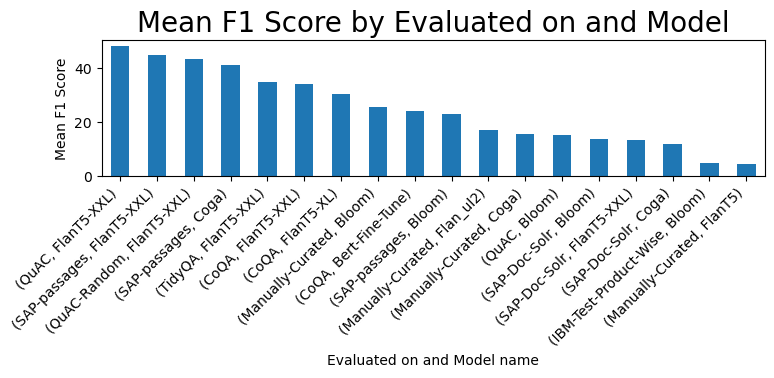

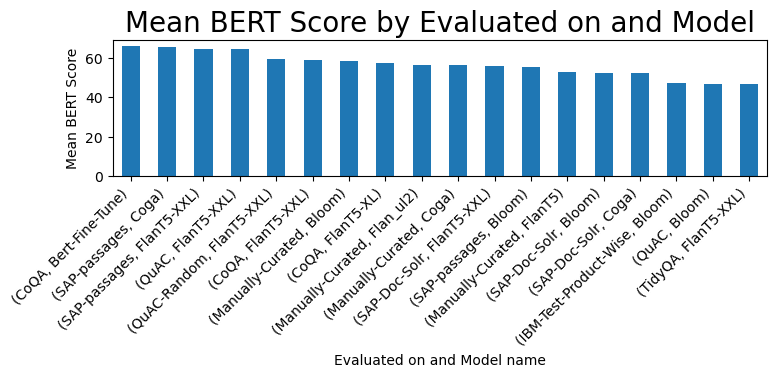

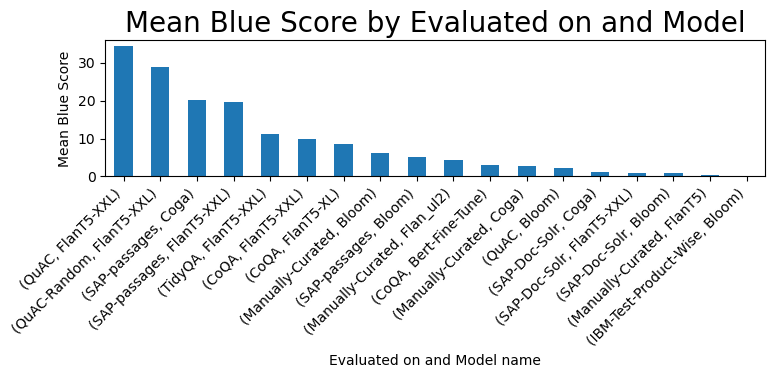

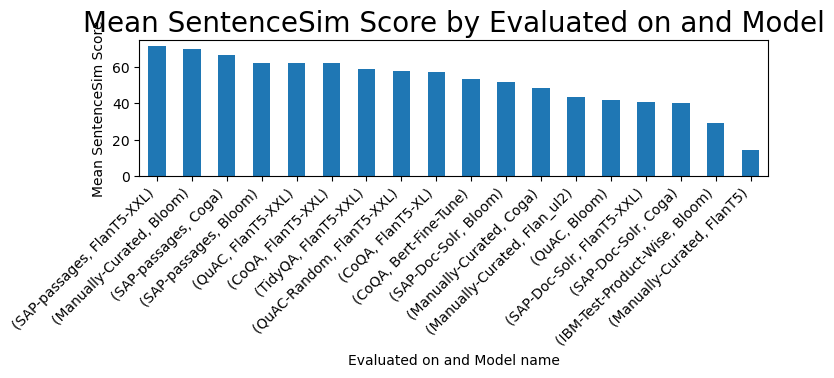

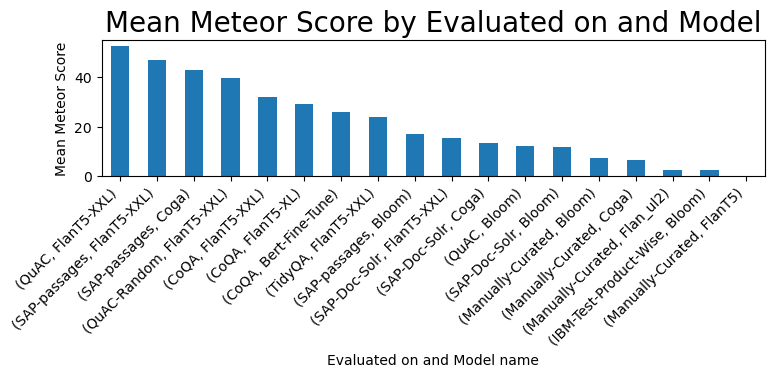

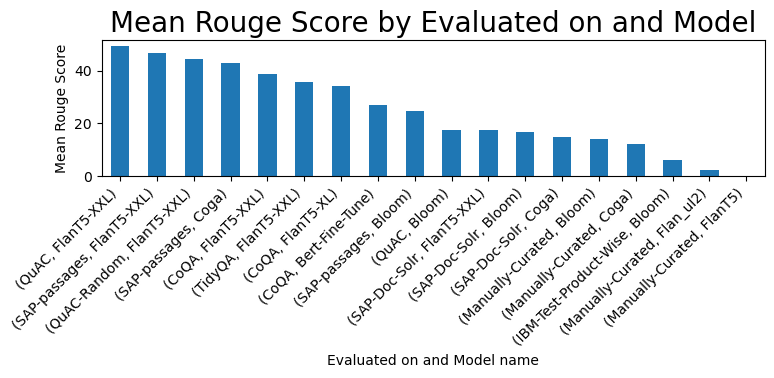

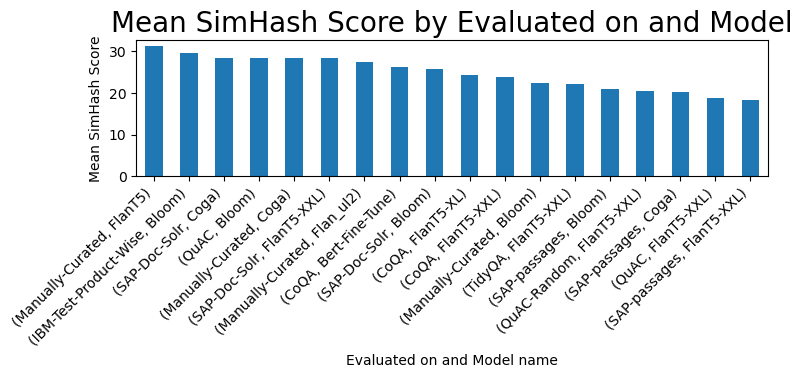

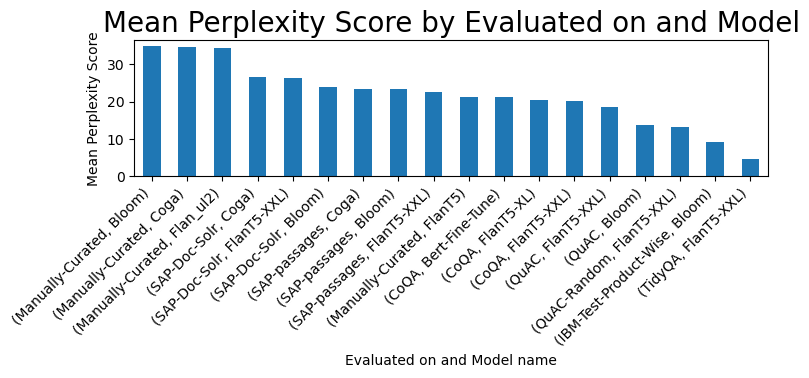

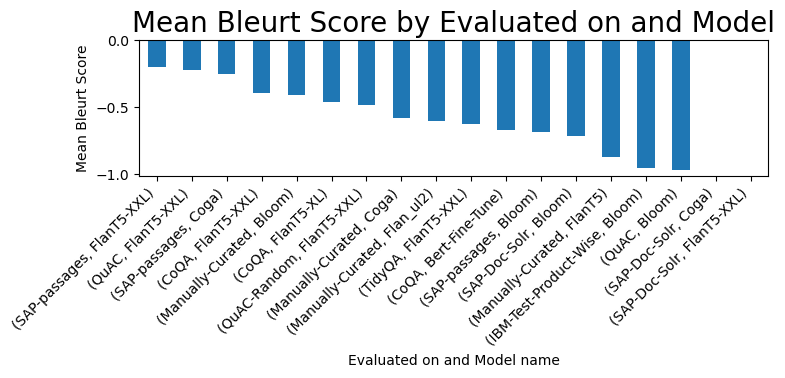

In [129]:
import pandas as pd
import glob
import re
import os.path
import datetime
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import tempfile

# Start MLflow run with current date and time as the run name
run_name = datetime.datetime.now().strftime("SuperKnowa_Evaluation_%Y%m%d%H%M%S")
mlflow.start_run(run_name=run_name)
mlflow.set_experiment('Model_Evaluation')

# List of file names
csv_files = glob.glob("*.csv")

# Define model size mappings
model_size_mapping = {
    'Bloom': '176B',
    'Bloom_internal': '176B',
    'FlanT5-XXL': '11B',
    'FlanT5-XL': '3B',
    'FlanT5': '3B',
    'Coga': '3B',
    'Flan_ul2': '20B'
}

# Log model size mapping as parameter
mlflow.log_param('model_size_mapping', model_size_mapping)

# Create an empty DataFrame
leaderboard = pd.DataFrame(columns=['Model Name', 'Dataset', 'F1 Score', 'BERT Score', 'Blue Score', 'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score', 'Count', 'Model Size'])

# Iterate over the scores files
for file in csv_files:
    model_name = file.split(".")[0]
    # Extract dataset and model name using regex pattern
    pattern = r'^(.*?)_(.*)$'
    match = re.match(pattern, model_name)
    if match:
        dataset = match.group(1)
        model = match.group(2)
    else:
        dataset = ""
        model = model_name

    # Get the model size based on the model name
    model_size = model_size_mapping.get(model, "")

    df = pd.read_csv(file)  # Assuming the scores are stored in CSV format
    # Get the file's creation date
    creation_time = os.path.getctime(file)
    creation_time = datetime.datetime.fromtimestamp(creation_time).strftime('%Y-%m-%d')

    # Get the mean scores for available columns
    mean_scores = {}
    for score in leaderboard.columns[2:-2]:
        # Perform a case-insensitive match for score column names
        available_columns = [col for col in df.columns if col.lower() == score.lower()]
        if available_columns:
            if score not in ['SimHash Score', 'Perplexity Score', 'Bleurt Score']:
                mean_scores[score] = df[available_columns[0]].mean() * 100  # Multiply score by 100
            else:
                mean_scores[score] = df[available_columns[0]].mean()
        else:
            mean_scores[score] = None  # Assign null or any other desired value

 
    leaderboard = leaderboard.append(
        {'Model Name': model, 'Evaluated on': dataset, **mean_scores, 'Experiment Date': creation_time,
         'Count': len(df), 'Model Size': model_size}, ignore_index=True)

# Move null values to the bottom of the table
leaderboard = leaderboard.sort_values(by=leaderboard.columns[2:-2].tolist(), na_position='last')

# Group by Model Name and calculate the mean scores
grouped_scores = leaderboard.groupby(["Evaluated on", "Model Name"]).mean(numeric_only=True)

# Display the leaderboard
result = leaderboard[
    ['Model Name', 'Evaluated on', 'Experiment Date', 'Count', 'Model Size', 'F1 Score', 'BERT Score', 'Blue Score',
     'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score']]

result = result[result["F1 Score"] > 4]
result = result.sort_values(["Evaluated on", "Model Name"]).reset_index(drop=True)
# Log model name and F1 score for each model
for index, row in result.iterrows():
    f1_score_value = row['F1 Score']
    value = row['Model Name']+"_"+row['Evaluated on']
    mlflow.log_metric(value , f1_score_value)
    


Parameters ={
    'Model Name': ['Bloom', 'FlanT5-XXL', 'FlanT5-XL', 'FlanT5', 'Coga', 'Flan_ul2'],
    'Temperature': [0.3, 0.7, 0.7, 0.7, 0.7, 0.7],
    'Top P': ['-', 1, 1, 1, 1, 1],
    'Top K': ['-', 50, 50, 50, 50, 50],
    'Decoding Method': ['sample', 'Greedy', 'Greedy', 'Greedy', 'Greedy', 'Greedy'],
    'Min New Tokens': [10, 10, 10, 10, 10, 10],
    'Max New Tokens': [200, 200, 200, 200, 200, 200],
    'Stop Sequences': ['Question', '-', '-', '-', '-', '-']
}

# New table to merge
new_table = pd.DataFrame(Parameters)

# Log the new_table DataFrame as a parameter tag
mlflow.log_param('Parameters', Parameters)


# Merge the two tables based on the "Model Name" column
merged_table = pd.merge(result, new_table, on='Model Name', how='outer')

# Set the plot size and create charts for all scores
scores = ['F1 Score', 'BERT Score', 'Blue Score', 'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score']

for score in scores:
    # Group by Model Name and calculate the mean score
    mean_scores = grouped_scores[score].sort_values(ascending=False)

    # Set the plot size
   # plt.figure(figsize=(10, 7))  # Adjust the width and height as needed
     # Set the plot size and DPI
        # Set the plot size and DPI
    fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the width, height, and DPI as needed

    # Plot the mean score as a bar plot
    mean_scores.plot(kind="bar", ax=ax)

    # Customize the plot
    plt.xlabel("Evaluated on and Model name")
    plt.ylabel(f"Mean {score}")
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Mean {score} by Evaluated on and Model", fontsize=20)

    # Adjust the figure's layout and padding
    plt.tight_layout(pad=1.5)  # Adjust the padding value as needed

    # Save the chart as a temporary file
    with tempfile.NamedTemporaryFile(suffix=".png") as temp_chart:
        chart_path = temp_chart.name
        plt.savefig(chart_path)
        # Remove the .png extension from the chart artifact path
        artifact_path = f"charts/mean_{score.lower().replace(' ', '_')}_chart"
        # Log the chart as an artifact
        mlflow.log_artifact(chart_path, artifact_path=artifact_path)

    # Display the plot
    plt.show()
    print("\n\n\n")

   
    
result.to_csv("Result/leaderboard.csv", index=False)
# Log leaderboard as artifact
mlflow.log_artifact("Result/leaderboard.csv")

merged_table.to_csv("Result/leaderboard_Parameters.csv", index=False)
# Log merged table as artifact
mlflow.log_artifact("Result/leaderboard_Parameters.csv")

# End MLflow run
mlflow.end_run()


In [104]:

# End MLflow run
mlflow.end_run()
